In [1]:
# import necessary libarries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# reading csv file
colnames=['Key', 'Values']
df = pd.read_csv("clusters2.csv", sep='\t', names=colnames, header=None)

In [3]:
# split column 
df[['Temperature', 'Humidity']] = df['Values'].str.split(',', expand=True)

In [4]:
df

,Key,Values,Temperature,Humidity
0,Ahmedabad,"27.729897931241165,55.62838814031063",27.729897931241165,55.62838814031063
1,Altenburg,"11.43016922235252,71.63062848887309",11.43016922235252,71.63062848887309
2,Aurangabad,"26.543639675837404,59.00795769119834",26.543639675837404,59.00795769119834
3,BELLA BELLA CAMPBELL,"7.600480120421551,89.0492499909462",7.600480120421551,89.0492499909462
4,Berlin,"9.855293170178777,75.98866903959865",9.855293170178777,75.98866903959865
5,Bhopal,"25.503742380991614,56.29068040179062",25.503742380991614,56.29068040179062
6,CLINTON,"1.7286987118004677,74.55528318132868",1.7286987118004677,74.55528318132868
7,DEASE LAKE,"-0.2089930423917471,72.64704227236474",-0.2089930423917471,72.64704227236474
8,Dresden,"9.629043785650877,75.00218489017777",9.629043785650877,75.00218489017777
9,ESTEVAN POINT CS BC,"9.250132167735957,89.84354751892707",9.250132167735957,89.84354751892707


In [5]:
df.dtypes

Key            object
Values         object
Temperature    object
Humidity       object
dtype: object

In [6]:
df['Temperature'] = df['Temperature'].astype(float, errors = 'raise')

In [7]:
df['Humidity'] = df['Humidity'].astype(float, errors = 'raise')

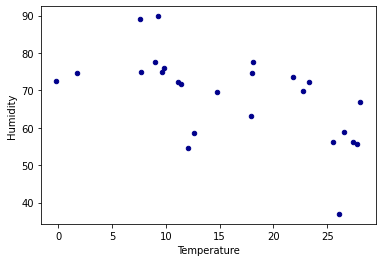

In [8]:
ax1 = df.plot.scatter(x='Temperature', y='Humidity', c='DarkBlue')

[[ 8.42530614 89.44639875]
 [22.556819   53.89220886]
 [ 7.53427185 74.31926024]
 [20.58947775 70.91641242]]


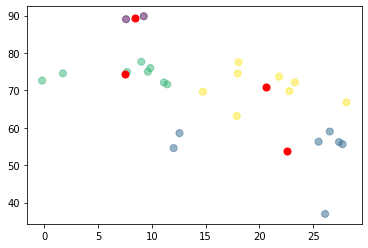

In [9]:
kmeans = KMeans(n_clusters=4).fit(df[['Temperature','Humidity']])
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Temperature'], df['Humidity'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

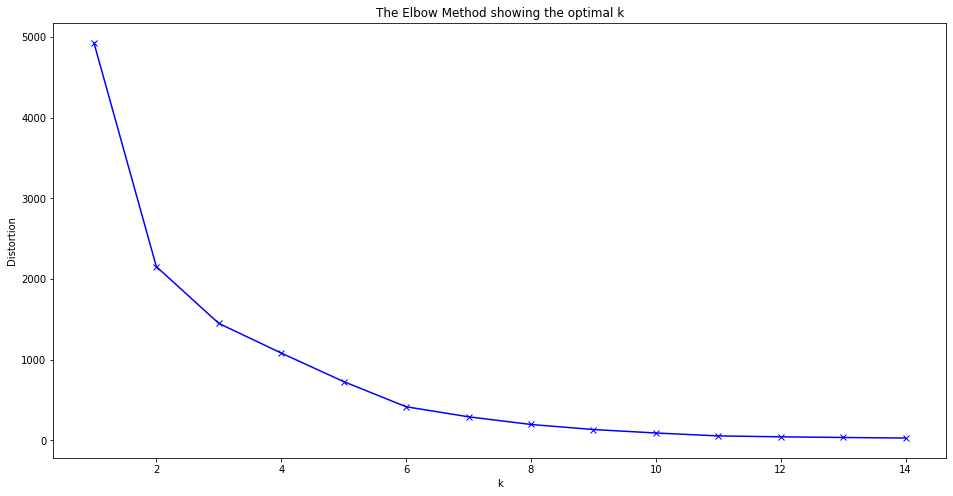

In [10]:
# using elbow method to find the optimal K

distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['Temperature','Humidity']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<IPython.core.display.Javascript object>


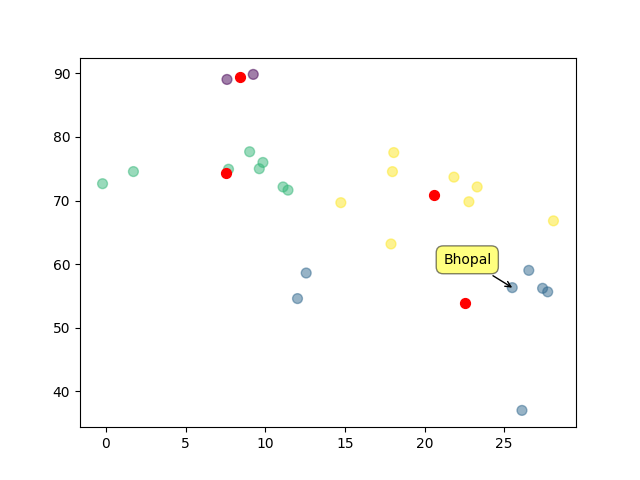

In [11]:
# pip install ipympl necessary to run matplotlib widget
# pip install mplcursors required to run mplcursors

import mplcursors
%matplotlib notebook
%matplotlib widget

fig, ax = plt.subplots()
sc = ax.scatter(df['Temperature'],df['Humidity'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

cursor = mplcursors.cursor(sc, hover=True)

@cursor.connect("add")

def on_add(sel):
    sel.annotation.set(text=(df['Key'].values)[sel.target.index])
    
plt.show()